In [4]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.stats import wilcoxon
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
import pydotplus
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

data = pd.read_csv('final_data.tsv', sep = '\t')

y = data.filter(regex='^permaneceu_',axis=1)
x = data.filter(regex='^nota_|^faltas_',axis=1)

seed = 13
scorer = make_scorer(accuracy_score)
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)

random_states = [13]

models = {
        'tree1':  GridSearchCV(
        Pipeline([
            ('tree', DecisionTreeClassifier(max_depth=1))]), 
        param_grid={'tree__criterion': ['entropy', 'gini'], 
                    'tree__splitter': ['best', 'random'],
                    'tree__random_state': random_states}
        ,
        scoring=scorer,
        cv=cv),
        'tree2':  GridSearchCV(
        Pipeline([
            ('tree', DecisionTreeClassifier(max_depth=2))]), 
        param_grid={'tree__criterion': ['entropy', 'gini'], 
                    'tree__splitter': ['best', 'random'],
                    'tree__random_state': random_states}
        ,
        scoring=scorer,
        cv=cv),
        'tree3':  GridSearchCV(
        Pipeline([
            ('tree', DecisionTreeClassifier(max_depth=3))]), 
        param_grid={'tree__criterion': ['entropy', 'gini'], 
                    'tree__splitter': ['best', 'random'],
                    'tree__random_state': random_states}
        ,
        scoring=scorer,
        cv=cv),
        'tree4':  GridSearchCV(
        Pipeline([
            ('tree', DecisionTreeClassifier(max_depth=4))]), 
        param_grid={'tree__criterion': ['entropy', 'gini'], 
                    'tree__splitter': ['best', 'random'],
                    'tree__random_state': random_states}
        ,
        scoring=scorer,
        cv=cv),
        'tree5':  GridSearchCV(
        Pipeline([
            ('tree', DecisionTreeClassifier(max_depth=5))]), 
        param_grid={'tree__criterion': ['entropy', 'gini'], 
                    'tree__splitter': ['best', 'random'],
                    'tree__random_state': random_states}
        ,
        scoring=scorer,
        cv=cv),
        'tree6':  GridSearchCV(
        Pipeline([
            ('tree', DecisionTreeClassifier(max_depth=6))]), 
        param_grid={'tree__criterion': ['entropy', 'gini'], 
                    'tree__splitter': ['best', 'random'],
                    'tree__random_state': random_states}
        ,
        scoring=scorer,
        cv=cv),
        'tree7':  GridSearchCV(
        Pipeline([
            ('tree', DecisionTreeClassifier(max_depth=7))]), 
        param_grid={'tree__criterion': ['entropy', 'gini'], 
                    'tree__splitter': ['best', 'random'],
                    'tree__random_state': random_states}
        ,
        scoring=scorer,
        cv=cv),
        'tree8':  GridSearchCV(
        Pipeline([
            ('tree', DecisionTreeClassifier(max_depth=8))]), 
        param_grid={'tree__criterion': ['entropy', 'gini'], 
                    'tree__splitter': ['best', 'random'],
                    'tree__random_state': random_states}
        ,
        scoring=scorer,
        cv=cv),
        'tree9':  GridSearchCV(
        Pipeline([
            ('tree', DecisionTreeClassifier(max_depth=9))]), 
        param_grid={'tree__criterion': ['entropy', 'gini'], 
                    'tree__splitter': ['best', 'random'],
                    'tree__random_state': random_states}
        ,
        scoring=scorer,
        cv=cv),
        'treeN':  GridSearchCV(
        Pipeline([
            ('tree', DecisionTreeClassifier(max_depth=None))]), 
        param_grid={'tree__criterion': ['entropy', 'gini'], 
                    'tree__splitter': ['best', 'random'],
                    'tree__random_state': random_states}
        ,
        scoring=scorer,
        cv=cv),
}

result1 = {}
result2 = {}
result3 = {}

for alg, clf in models.items():
  result1[alg] = cross_val_score(clf, x, y.permaneceu_ano2, cv=cv)
  result2[alg] = cross_val_score(clf, x, y.permaneceu_ano3, cv=cv)
  result3[alg] = cross_val_score(clf, x, y.permaneceu_ano4, cv=cv)

result1 = pd.DataFrame.from_dict(result1)
result2 = pd.DataFrame.from_dict(result2)
result3 = pd.DataFrame.from_dict(result3)

media_result1 = result1.apply(lambda x: "{:.2f}".format(x.mean())) 
media_result2 = result2.apply(lambda x: "{:.2f}".format(x.mean()))
media_result3 = result3.apply(lambda x: "{:.2f}".format(x.mean()))

erro_result1 = result1.apply(lambda x: "{:.2f}".format(x.std()))
erro_result2 = result2.apply(lambda x: "{:.2f}".format(x.std()))
erro_result3 = result3.apply(lambda x: "{:.2f}".format(x.std()))

print(result1.apply(lambda x: "{:.2f} ± {:.2f}".format(x.mean(), x.std())))
print(result2.apply(lambda x: "{:.2f} ± {:.2f}".format(x.mean(), x.std())))
print(result3.apply(lambda x: "{:.2f} ± {:.2f}".format(x.mean(), x.std())))

#print(wilcoxon(result1.tree1, result1.tree2))
#print(wilcoxon(result2.tree1, result2.tree2))
#print(wilcoxon(result3.tree1, result3.tree2))

tree1 = models['tree1']
tree7 = models['tree7']
tree4 = models['tree4']

tree1.fit(x, y.permaneceu_ano2)
print(tree1.best_estimator_)

tree7.fit(x, y.permaneceu_ano3)
print(tree7.best_estimator_)

tree4.fit(x, y.permaneceu_ano4)
print(tree4.best_estimator_)

tree1    0.94 ± 0.07
tree2    0.93 ± 0.07
tree3    0.90 ± 0.08
tree4    0.87 ± 0.11
tree5    0.88 ± 0.09
tree6    0.84 ± 0.12
tree7    0.84 ± 0.11
tree8    0.85 ± 0.11
tree9    0.84 ± 0.11
treeN    0.85 ± 0.11
dtype: object
tree1    0.82 ± 0.08
tree2    0.84 ± 0.09
tree3    0.84 ± 0.09
tree4    0.87 ± 0.11
tree5    0.86 ± 0.09
tree6    0.85 ± 0.12
tree7    0.88 ± 0.10
tree8    0.88 ± 0.10
tree9    0.88 ± 0.10
treeN    0.88 ± 0.10
dtype: object
tree1    0.79 ± 0.16
tree2    0.85 ± 0.11
tree3    0.85 ± 0.10
tree4    0.95 ± 0.07
tree5    0.92 ± 0.08
tree6    0.92 ± 0.08
tree7    0.93 ± 0.09
tree8    0.93 ± 0.09
tree9    0.93 ± 0.09
treeN    0.93 ± 0.09
dtype: object
Pipeline(memory=None,
         steps=[('tree',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='entropy', max_depth=1,
                                        max_features=None, max_leaf_nodes=None,
                                        min_impurity_

Text(0, 0.5, 'Acurácia ± Desvio padrão')

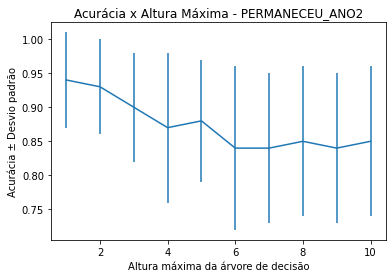

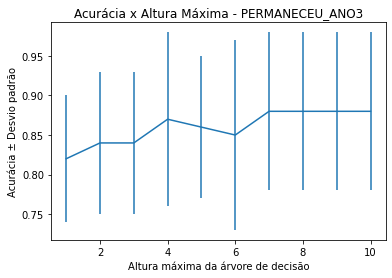

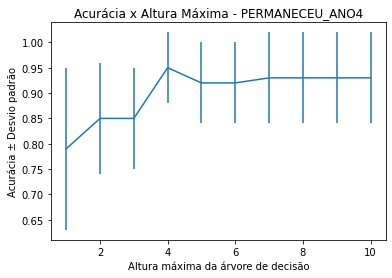

In [5]:
import numpy as np
plt.figure()
plt.errorbar([1,2,3,4,5,6,7,8,9,10], media_result1.astype(np.float), xerr=0, yerr=erro_result1.astype(np.float))
plt.title("Acurácia x Altura Máxima - PERMANECEU_ANO2")
plt.xlabel("Altura máxima da árvore de decisão")
plt.ylabel("Acurácia ± Desvio padrão")

plt.figure()
plt.errorbar([1,2,3,4,5,6,7,8,9,10], media_result2.astype(np.float), xerr=0, yerr=erro_result2.astype(np.float))
plt.title("Acurácia x Altura Máxima - PERMANECEU_ANO3")
plt.xlabel("Altura máxima da árvore de decisão")
plt.ylabel("Acurácia ± Desvio padrão")

plt.figure()
plt.errorbar([1,2,3,4,5,6,7,8,9,10], media_result3.astype(np.float), xerr=0, yerr=erro_result3.astype(np.float))
plt.title("Acurácia x Altura Máxima - PERMANECEU_ANO4")
plt.xlabel("Altura máxima da árvore de decisão")
plt.ylabel("Acurácia ± Desvio padrão")
